In [114]:
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os

In [115]:
def generate_paths(Mg_dir,compounds, condition, window, replicas,ftype):
    paths = []
    path_1 = '/home/arasouli/repos/alchemical'
    if ftype == 'prmtop':
        path_3 = '1-sys_prep/box.prmtop'
    elif ftype == 'dcd':
        path_3 = '2-sim_run/equ_2/equ.0.dcd'

    for compound in compounds:
        for i in range(1, replicas + 1):
            path = os.path.join(path_1, Mg_dir, compound, condition, window, f"{i}-rep{i}", path_3)
            paths.append(path)
    return paths


In [116]:
def generate_paths_K(Mg_dir,compounds, condition, window, replicas,ftype):
    paths = []
    path_1 = '/home/arasouli/repos/alchemical'
    if ftype == 'prmtop':
        path_3 = '1-sys_prep/box.prmtop'
    elif ftype == 'dcd':
        path_3 = '2-sim_run/equ_2/equ.0.dcd'
        path_4 = '2-sim_run/equ_2/equ.1.dcd'

    for compound in compounds:
        for i in range(1, replicas + 1):
            if ftype == 'prmtop':
                path = os.path.join(path_1, Mg_dir, compound, condition, window, f"{i}-rep{i}", path_3)
                paths.append(path)
                paths.append(path)
            elif ftype == 'dcd':
                path = os.path.join(path_1, Mg_dir, compound, condition, window, f"{i}-rep{i}", path_3)
                path2 = os.path.join(path_1, Mg_dir, compound, condition, window, f"{i}-rep{i}", path_4)
                paths.append(path)
                paths.append(path2)

    return paths

In [117]:
def get_rdf(dcds,prmtops,ion_sel):
    
    # Store the RDFs from each DCD
    rdfs = []
    for dcd, prmtop in zip(dcds, prmtops):
        u = mda.Universe(prmtop,dcd)

        # Select the P and ion atoms
        phosphate = u.select_atoms("(nucleic or resname G5 C3) and name OP1 OP2")
        sodium = u.select_atoms(ion_sel)

        # Set the bin size and maximum distance
        bin_size = 0.1
        max_distance = 8

        pdf = mda.analysis.rdf.InterRDF(phosphate, sodium, nbins=int(max_distance/bin_size), range=(0.0, max_distance))
        pdf.run()

        r = pdf.bins
        gr = pdf.rdf

        # Loop over all frames in the trajectory

        rdfs.append(gr)
    return rdfs
    

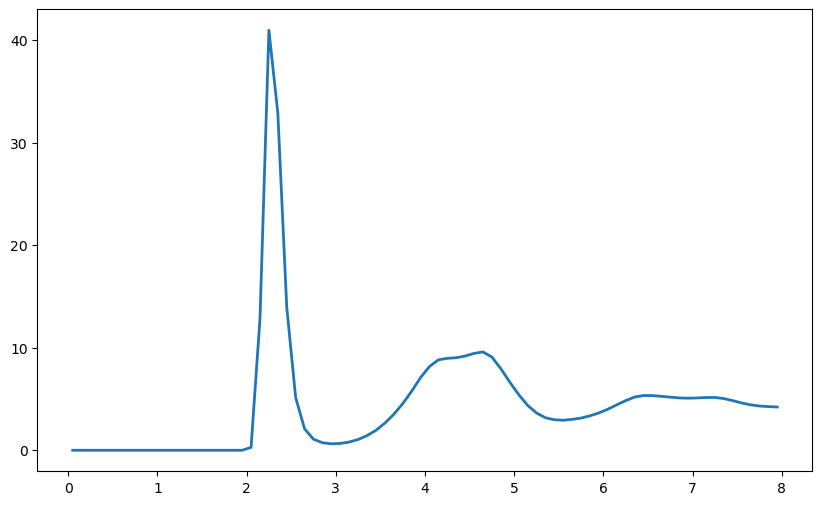

In [118]:
# List of DCD files for (55 mM NaCl + 2 Mg)
compounds = ['2-theophylline', '3-1_methylxanthine', '4-3_methylxanthine', '5-hypoxanthine', '6-xanthine', '7-caffeine']
dcds = generate_paths('rna_small_molecule_FE', compounds, '3-55NaCl_Mg','1-40winCmplx_30winLig',3,'dcd')
prmtops = generate_paths('rna_small_molecule_FE', compounds, '3-55NaCl_Mg', '1-40winCmplx_30winLig',3,'prmtop')

rdf_sod = get_rdf(dcds,prmtops,"name Na+")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(r, np.mean(rdf_sod, axis=0), label='Na$^+$ TIP3P, 2 Mg$^{2+}$', linewidth=2)




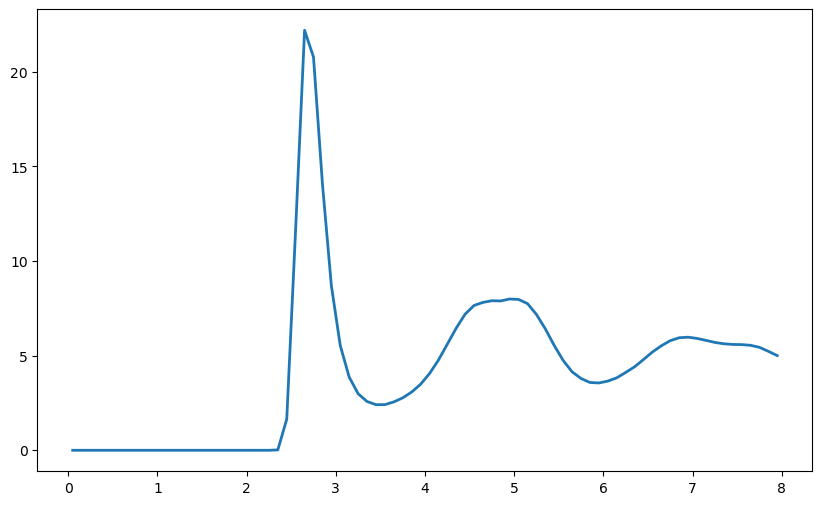

In [119]:
dcds_K = generate_paths_K('rna_small_molecule_FE', compounds, '10-55KCl_Mg','1-40winCmplx_30winLig',3,'dcd')
prmtops_K = generate_paths_K('rna_small_molecule_FE', compounds, '10-55KCl_Mg', '1-40winCmplx_30winLig',3,'prmtop')
rdf_pot = get_rdf(dcds_K,prmtops_K,"name K+")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(r, np.mean(rdf_pot, axis=0), label='K$^+$ TIP3P, 2 Mg$^{2+}$', linewidth=2)

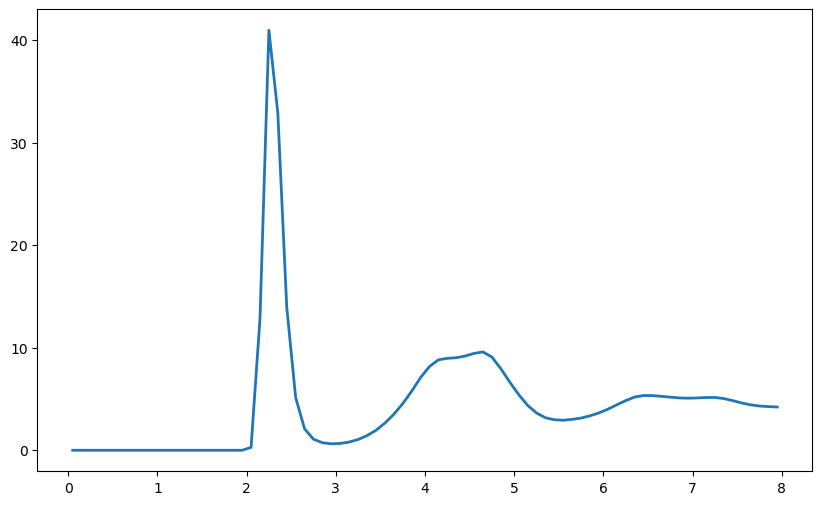

In [121]:
# List of DCD files for (55 mM NaCl + 2 Mg)
compounds = ['2-theophylline', '3-1_methylxanthine', '4-3_methylxanthine', '5-hypoxanthine', '6-xanthine', '7-caffeine']
dcds_OPC = generate_paths('rna_small_molecule_FE', compounds, '3-55NaCl_Mg','6-opc_40winCmplx_30winLig',3,'dcd')
prmtops_OPC = generate_paths('rna_small_molecule_FE', compounds, '3-55NaCl_Mg', '6-opc_40winCmplx_30winLig',3,'prmtop')

rdf_sod_OPC = get_rdf(dcds_OPC,prmtops_OPC,"name Na+")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(r, np.mean(rdf_sod_OPC, axis=0), label='Na$^+$ OPC, 2 Mg$^{2+}$', linewidth=2)

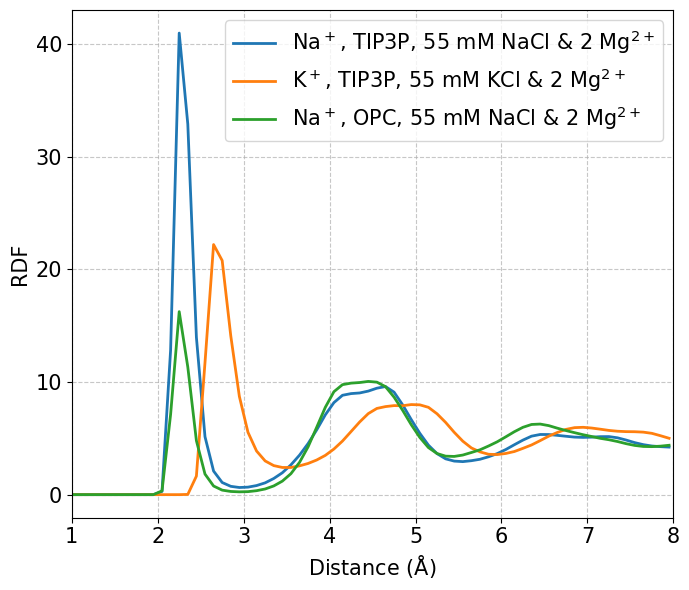

In [141]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(r, np.mean(rdf_sod, axis=0), label='Na$^+$, TIP3P, 55 mM NaCl & 2 Mg$^{2+}$', linewidth=2)
ax.plot(r, np.mean(rdf_pot, axis=0), label='K$^+$, TIP3P, 55 mM KCl & 2 Mg$^{2+}$', linewidth=2)
ax.plot(r, np.mean(rdf_sod_OPC, axis=0), label='Na$^+$, OPC, 55 mM NaCl & 2 Mg$^{2+}$', linewidth=2)
ax.legend(fontsize=15)
plt.xlim(1,8)
ax.set_xlabel("Distance ($\mathrm{\AA}$)", fontsize=15)
ax.set_ylabel("RDF", fontsize=15)
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f"./figs/RDF_Na_K_OPC.pdf", bbox_inches='tight')

/opt/install/conda/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/opt/install/conda/lib/python3.10/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/opt/install/conda/lib/python3.10/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, Deprec

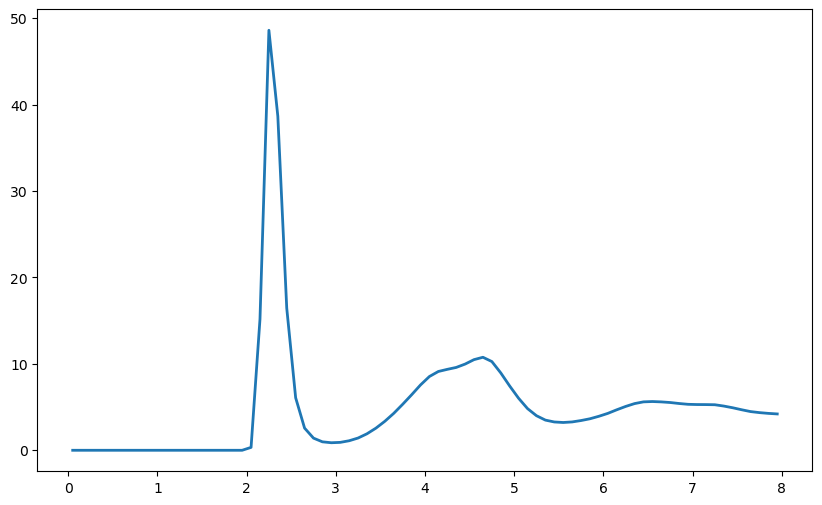

In [142]:
# List of DCD files for (55 mM NaCl + 0 Mg)
compounds = ['2-theophylline', '3-1_methylxanthine', '4-3_methylxanthine', '5-hypoxanthine', '6-xanthine', '7-caffeine']
dcds = generate_paths('rna_small_molecule_FE', compounds, '4-55NaCl','1-40winCmplx_30winLig',3,'dcd')
prmtops = generate_paths('rna_small_molecule_FE', compounds, '4-55NaCl', '1-40winCmplx_30winLig',3,'prmtop')

rdf_sod_0Mg = get_rdf(dcds,prmtops,"name Na+")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(r, np.mean(rdf_sod_0Mg, axis=0), label='Na$^+$ TIP3P, 0 Mg$^{2+}$', linewidth=2)


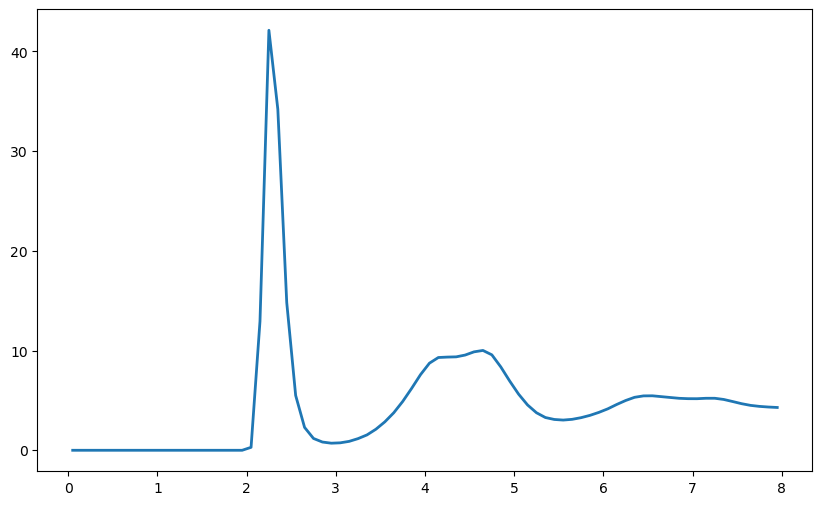

In [143]:
# List of DCD files for (55 mM NaCl + 3 Mg)
compounds = ['2-theophylline', '3-1_methylxanthine', '4-3_methylxanthine', '5-hypoxanthine', '6-xanthine', '7-caffeine']
dcds = generate_paths('3_mg_rna_small_molecule_FE', compounds, '1-55NaCl_3Mg','1-40winCmplx_30winLig',3,'dcd')
prmtops = generate_paths('3_mg_rna_small_molecule_FE', compounds, '1-55NaCl_3Mg', '1-40winCmplx_30winLig',3,'prmtop')

rdf_sod_3Mg = get_rdf(dcds,prmtops,"name Na+")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(r, np.mean(rdf_sod_3Mg, axis=0), label='Na$^+$ TIP3P, 3 Mg$^{2+}$', linewidth=2)

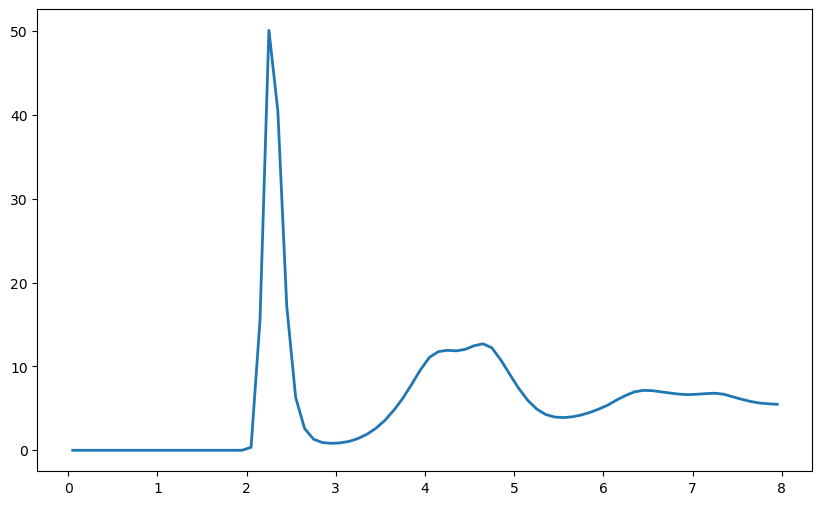

In [144]:
# List of DCD files for (0 mM NaCl + 3 Mg)
compounds = ['2-theophylline', '3-1_methylxanthine', '4-3_methylxanthine', '5-hypoxanthine', '6-xanthine', '7-caffeine']
dcds = generate_paths('3_mg_rna_small_molecule_FE', compounds, '2-Neut_3Mg','1-40winCmplx_30winLig',3,'dcd')
prmtops = generate_paths('3_mg_rna_small_molecule_FE', compounds, '2-Neut_3Mg', '1-40winCmplx_30winLig',3,'prmtop')

rdf_sod_3Mg_neut = get_rdf(dcds,prmtops,"name Na+")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(r, np.mean(rdf_sod_3Mg_neut, axis=0), label='Na$^+$ TIP3P, 3 Mg$^{2+}$', linewidth=2)

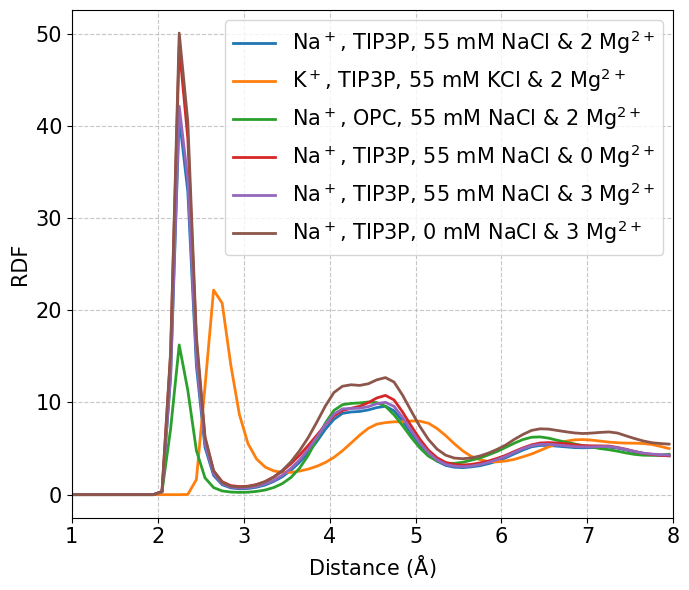

In [148]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(r, np.mean(rdf_sod, axis=0), label='Na$^+$, TIP3P, 55 mM NaCl & 2 Mg$^{2+}$', linewidth=2)
ax.plot(r, np.mean(rdf_pot, axis=0), label='K$^+$, TIP3P, 55 mM KCl & 2 Mg$^{2+}$', linewidth=2)
ax.plot(r, np.mean(rdf_sod_OPC, axis=0), label='Na$^+$, OPC, 55 mM NaCl & 2 Mg$^{2+}$', linewidth=2)
ax.plot(r, np.mean(rdf_sod_0Mg, axis=0), label='Na$^+$, TIP3P, 55 mM NaCl & 0 Mg$^{2+}$', linewidth=2)
ax.plot(r, np.mean(rdf_sod_3Mg, axis=0), label='Na$^+$, TIP3P, 55 mM NaCl & 3 Mg$^{2+}$', linewidth=2)
ax.plot(r, np.mean(rdf_sod_3Mg_neut, axis=0), label='Na$^+$, TIP3P, 0 mM NaCl & 3 Mg$^{2+}$', linewidth=2)

ax.legend(fontsize=15)
plt.xlim(1,8)
ax.set_xlabel("Distance ($\mathrm{\AA}$)", fontsize=15)
ax.set_ylabel("RDF", fontsize=15)
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f"./figs/RDF_Na_K_OPC.pdf", bbox_inches='tight')